In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Data Description

### The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species.

#### The species classes are already encoded 

intoIris setosa = 0

Iris virginica = 1

Iris versicolor = 2

## Your Task is to classify the flowers into 1 of the 3 species using the 4 feature listed below

In [2]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris['species'] = iris_dataset.target
iris = iris.rename(columns={'sepal length (cm)':'sepal length','sepal width (cm)':'sepal width','petal length (cm)':'petal length','petal width (cm)':'petal width'})
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting the data into train and test
remember perform EDA only on Train data
but if you change anything in the train set, also change it in the test set

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target, test_size= 0.2, random_state= 123)

In [4]:
print(x_train.shape)

(120, 4)


In [5]:
print(x_test.shape)

(30, 4)


In [6]:
print(y_train.shape)

(120,)


In [7]:
print(y_test.shape)

(30,)


In [8]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [10]:
iris.isnull().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
species         False
dtype: bool

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Your Assignment starts here

## First make some EDA
you can do any form of EDA, I want at least 4 forms of EDA (ask 4 questions about the data and answer them)

Text(0.5, 1.0, 'CORRELATION MATRIX')

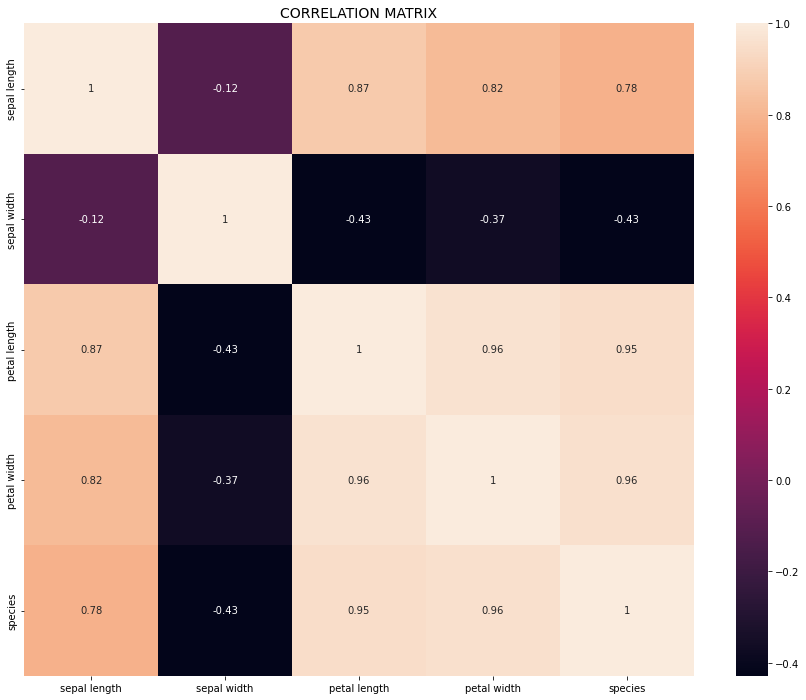

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,12))
ax = sns.heatmap(iris.corr(), annot=True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

In [13]:
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

### There are high corr positeve between "petal length" and "species"
### and high corr positive between "petal width" and "species"
## Conclude these features have most effective to classify the species

In [14]:
def my_plot(col_name):    
    plt.figure(figsize=(8,6))
    plt.hist(iris[col_name])
    plt.title(f"{col_name} Distribution", fontsize=16)
    plt.xlabel(col_name)
    plt.ylabel("Car Count")
    plt.show()

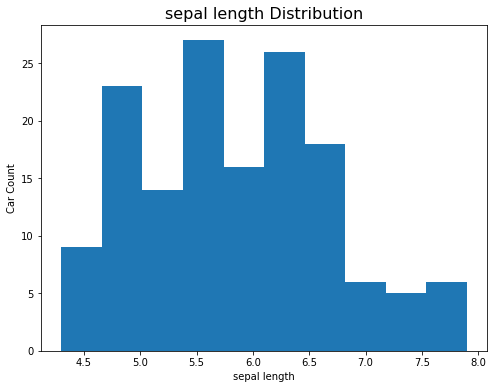

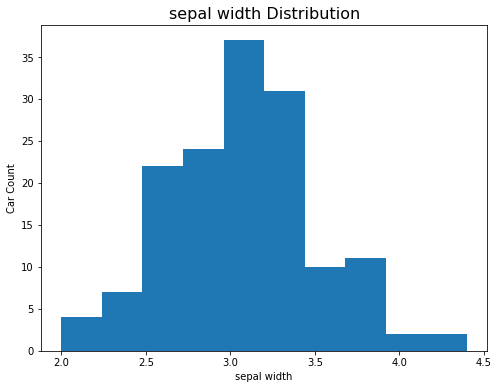

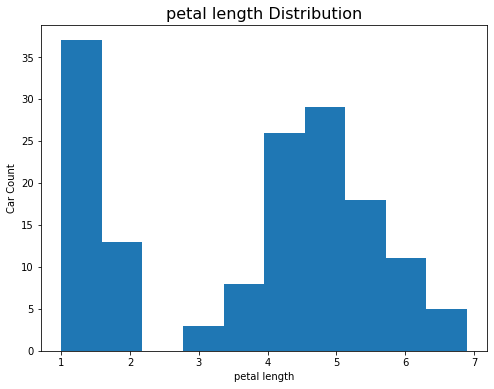

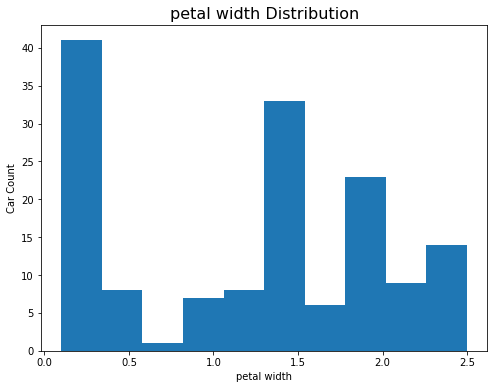

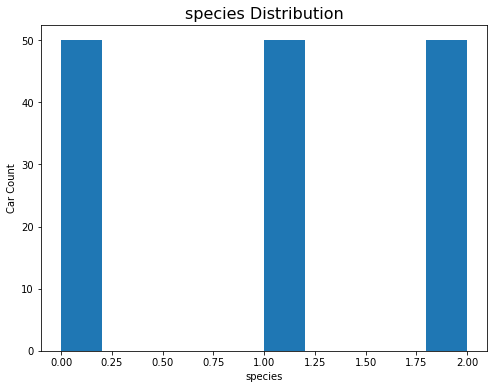

In [15]:
num_cols = iris.columns

for col in num_cols:
    my_plot(col)

## No have outliers in this data

<Figure size 432x288 with 0 Axes>

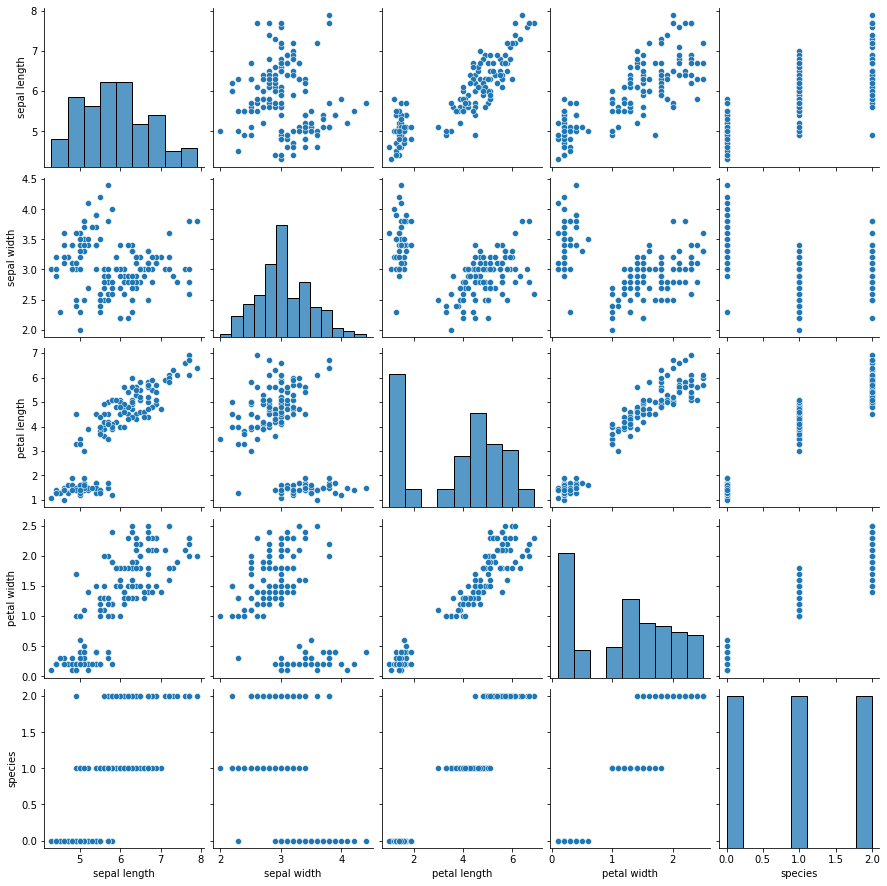

In [16]:
plt.figure()
sns.pairplot(iris[num_cols], palette='tab10', diag_kind="hist")
plt.show()

# Concluding

#### 1- Is sepal length influence to classify the species?
* Maybe Yes

#### 1- Is petal length influence to classify the species?
* Yes

#### 1- Is petal width effective to classify the species?
* Yes

#### 1- Is sepal width influence to classify the species?
* No


In [40]:
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

# Model Training

## Use KNN classifier to classify the species of the flower
Check this documentation to know how to use it
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

first Import the classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

define the classifier and how many nearest neighbors to use (the value of K)

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

train the model on train data

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

use the model to predict on the train data

In [20]:
y_train_knn=knn.predict(x_train)

use the model to predict on the test data

In [21]:
y_pred = knn.predict(x_test)

use accuracy_score to measure the model's performance 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print(accuracy_score(y_test,y_pred))

0.9


## Repeat all the training steps with different value of K
you can repeat it as much as you want

In [24]:
knn = KNeighborsClassifier(n_neighbors=2)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
y_train_knn=knn.predict(x_train)

In [27]:
y_pred = knn.predict(x_test)

In [28]:
print(accuracy_score(y_test,y_pred))

0.9


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_train_knn = knn.predict(x_train)

In [32]:
y_pred = knn.predict(x_test)

In [33]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [35]:
knn = KNeighborsClassifier(n_neighbors=9)

In [36]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [37]:
y_train_knn=knn.predict(x_train)

In [38]:
y_pred = knn.predict(x_test)

In [39]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


# What was the best value for K

### I think the best value for k is : 3 or 9
#### Because Has High Accuracy (~0.97)